In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 6
RANDOM_SEED = 56
np.random.seed(RANDOM_SEED)

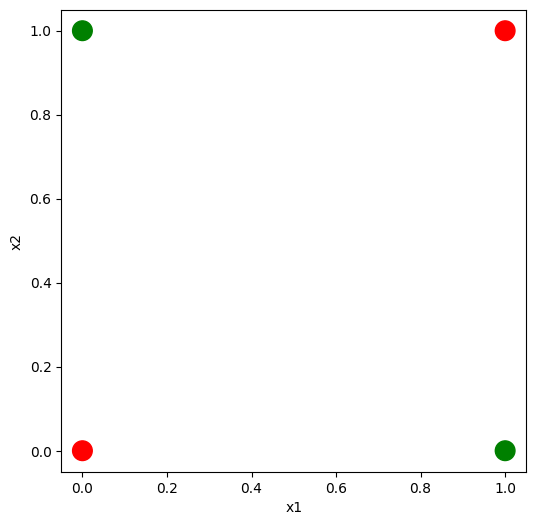

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0], [1], [1], [0]])
colors = ['green' if y_ == 1 else 'blue' for y_ in y]
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.scatter(X[:,0],X[:,1],s=200,c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [5]:
def sigmoid(x):

  return 1 / (1 + np.exp(-x))

def sigmoid_(y):

  return y * (1-y)

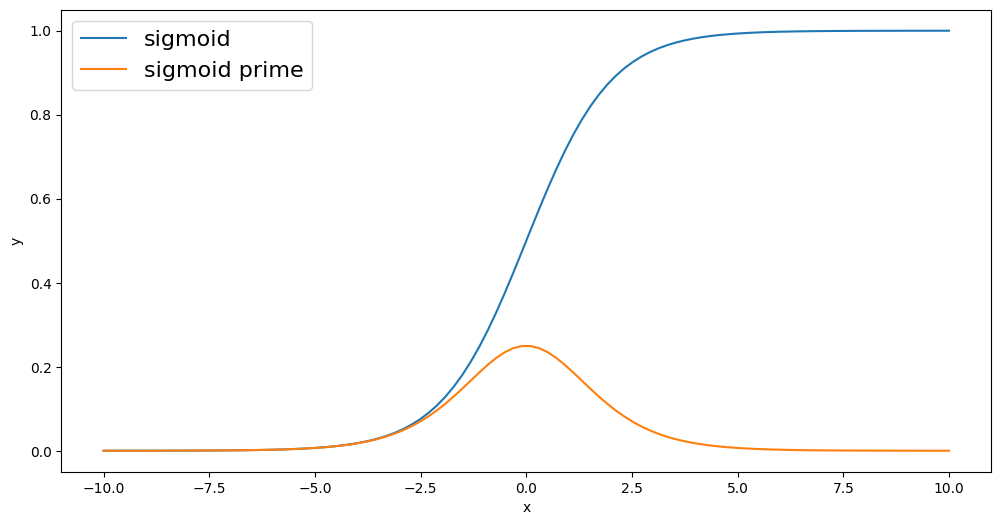

In [6]:
x = np.linspace(-10., 10., num=100)
sig = sigmoid(x)
sig_prime = sigmoid_(sig)
plt.plot(x, sig, label="sigmoid")
plt.plot(x, sig_prime, label="sigmoid prime")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

In [7]:
def dense(inputs, weights):
  return np.matmul(inputs, weights)

In [9]:
input_size = 2
hidden_size = 3
output_size = 1
def initialize_weights():

  w1 = np.random.uniform(size=(input_size, hidden_size))

  w2 = np.random.uniform(size=(hidden_size, output_size))
  return w1, w2

w1, w2 = initialize_weights()

In [11]:
def forward_pass(X):

  net_hidden = dense(X, w1)

  act_hidden = sigmoid(net_hidden)

  y_hat = dense(act_hidden, w2)
  return act_hidden, y_hat

In [13]:
def mse(y_hat, y):
  residual = y_hat - y
  error = np.mean(0.5 * (residual ** 2))
  return residual, error

In [14]:
def backward(X, y_hat, act_hidden):
  residual, error = mse(y_hat, y)
  N = X.shape[0]
  dL_dy = 1.0 / N * residual
  dy_dw2 = act_hidden
  dL_dw2 = np.matmul(dL_dy.T, dy_dw2)
  dL_dw2 = dL_dw2.T

  da_dh = sigmoid_(act_hidden)
  dL_dw1 = np.zeros_like(w1)
  for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):

      s = residual[:, 0] * w2[j, 0] * da_dh[:, j] * X[:, i]
      dL_dw1[i, j] = np.mean(s)
  return dL_dw2, dL_dw1

In [15]:
def backward_faster(X, y_hat, act_hidden):
  residual, error = mse(y_hat, y)
  N = X.shape[0]
  dL_dy = 1.0 / N * residual
  dy_dw2 = act_hidden
  dL_dw2 = np.matmul(dL_dy.T, dy_dw2)

  dL_dw2 = dL_dw2.T
  da_dh = sigmoid_(act_hidden)
  dL_dw1 = 1.0 / N * np.matmul(X.T, dL_dw1)
  return dL_dw2, dL_dw1

In [16]:
def backward_pass(X, y_hat, act_hidden):
  residual, error = mse(y_hat, y)

  N = X.shape[0]
  dL_dy = 1.0 / N * residual
  dy_dw2 = act_hidden
  dL_dw2 = np.matmul(dL_dy.T, dy_dw2)

  dL_dw2 = dL_dw2.T
  dL_dw1 = 1.0 / N * np.matmul(X.T, np.matmul(residual, w2.T) * sigmoid_(act_hidden))
  return dL_dw2, dL_dw1, error

Epoch 0> Training error: 0.242910
Epoch 200> Training error: 0.125092
Epoch 400> Training error: 0.124879
Epoch 600> Training error: 0.124627
Epoch 800> Training error: 0.124326
Epoch 1000> Training error: 0.123952
Epoch 1200> Training error: 0.123469
Epoch 1400> Training error: 0.122817
Epoch 1600> Training error: 0.121902
Epoch 1800> Training error: 0.120585
Epoch 2000> Training error: 0.118672
Epoch 2200> Training error: 0.115921
Epoch 2400> Training error: 0.112075
Epoch 2600> Training error: 0.106948
Epoch 2800> Training error: 0.100524
Epoch 3000> Training error: 0.093008
Epoch 3200> Training error: 0.084782
Epoch 3400> Training error: 0.076276
Epoch 3600> Training error: 0.067875
Epoch 3800> Training error: 0.059886
Epoch 4000> Training error: 0.052509
Epoch 4200> Training error: 0.045838
Epoch 4400> Training error: 0.039884
Epoch 4600> Training error: 0.034615
Epoch 4800> Training error: 0.029979
Epoch 5000> Training error: 0.025915
Epoch 5200> Training error: 0.022364
Epoch 54

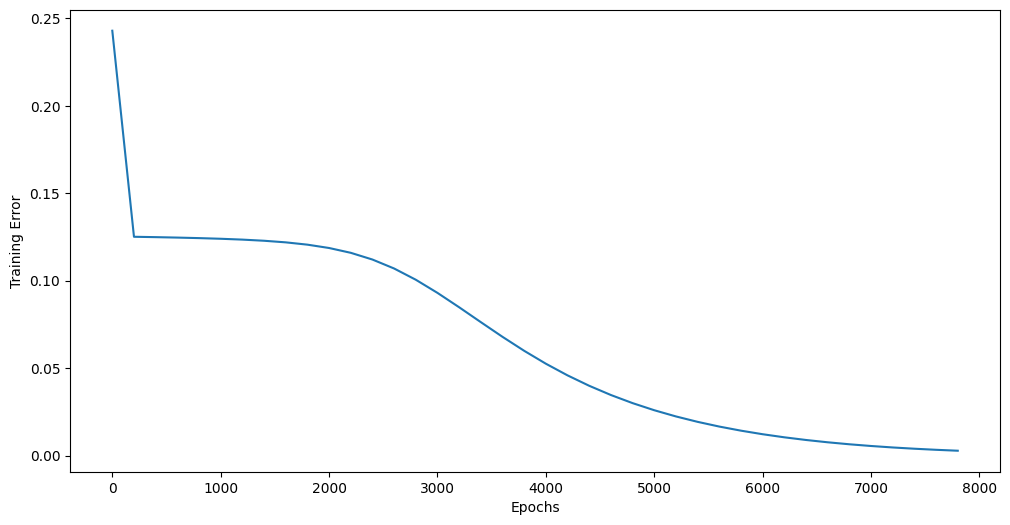

In [20]:
n_epochs = 8000
learning_rate = 0.1
training_errors = []
w1, w2 = initialize_weights()
for epoch in range(n_epochs):
  act_hidden, y_hat = forward_pass(X)
  dw2, dw1, error = backward_pass(X, y_hat, act_hidden)
  w2 = w2 - learning_rate * dw2
  w1 = w1 - learning_rate * dw1
  if epoch % 200 == 0:
    print('Epoch %d> Training error: %f' % (epoch, error))
    training_errors.append([epoch, error])
training_errors = np.asarray(training_errors)
plt.plot(training_errors[:, 0], training_errors[:, 1]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

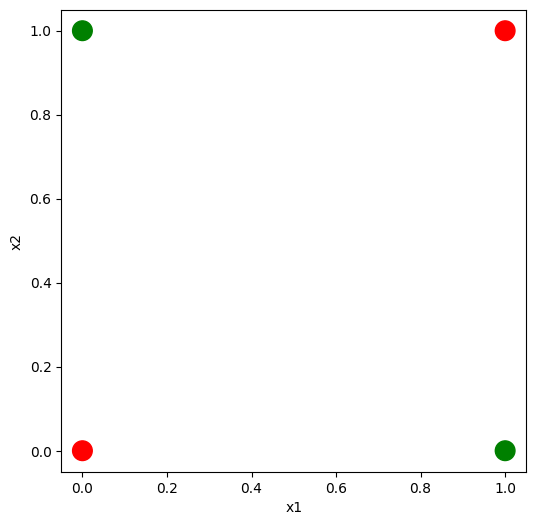

In [18]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_hat = [np.round(forward_pass(x)[1]) for x in X]
colors = ['green' if y_ == 1 else 'blue' for y_ in y_hat]
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.scatter(X[:,0],X[:,1],s=200,c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

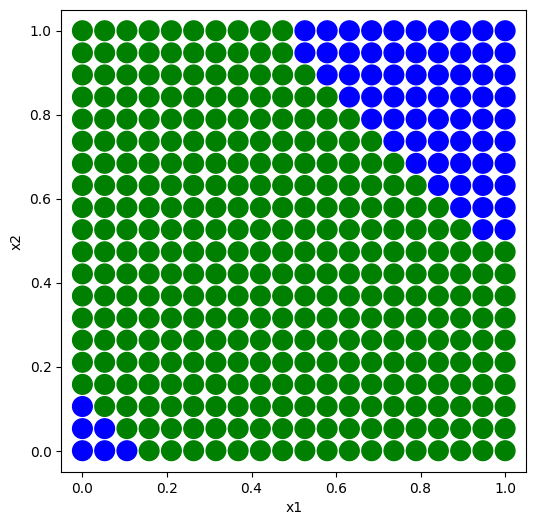

In [19]:
resolution = 20
min_x, min_y = 0.0, 0.0
max_x, max_y = 1.0, 1.0
xv, yv = np.meshgrid(np.linspace(min_x, max_x, resolution), np.linspace
(min_y, max_y, resolution))
X_extended = np.concatenate([xv[..., np.newaxis], yv[..., np.newaxis]],
axis=-1)
X_extended = np.reshape(X_extended, [-1, 2])
y_hat = [np.round(forward_pass(x)[1]) for x in X_extended]
colors = ['green' if y_ == 1 else 'blue' for y_ in y_hat]
fig = plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.scatter(X_extended[:,0],X_extended[:,1],s=200,c=colors)
plt.xlabel('x1')

plt.ylabel('x2')
plt.show()